In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustering.kmesar import *
from sklearn.datasets import make_blobs

In [2]:
points = np.array([[1, 2], [3, 3], [0, 1]])
print(np.mean(points, axis=0))

[1.33333333 2.        ]


[0. 0. 1. 1. 0. 0. 1. 2. 2. 2. 2. 2.]
1.019803902718557
0.8


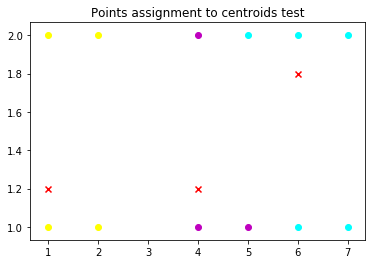

In [3]:
centroids = np.array([
    [1, 1.2],
    [4, 1.2],
    [6, 1.8]
])
points = np.array([[1, 1], [2, 1], [4, 1], [5, 1], [1, 2], [2, 2], [4, 2], [5, 2],
                   [6, 1], [7, 1], [6, 2], [7, 2]])

labels = assign_points_to_centroids(points, centroids)
print(labels)

colors = ['yellow', 'm', 'cyan', 'brown']
for k in range(np.unique(labels).shape[0]):
    points_k = extract_labeled_points(points, labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('Points assignment to centroids test')
plt.show()

print(euclidean_distance(np.array([4, 2]), np.array([5, 1.8])))
print(euclidean_distance(np.array([4, 2]), np.array([4, 1.2])))

[[1.5        1.5       ]
 [4.33333333 1.33333333]
 [6.2        1.6       ]]


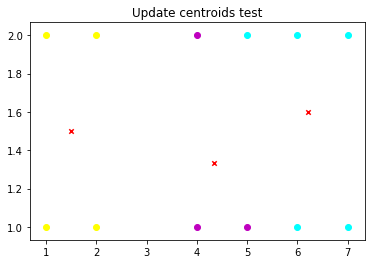

In [4]:

for k in range(np.unique(labels).shape[0]):
    points_k = extract_labeled_points(points, labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

new_centroids = update_centroids(points, centroids, labels)
print(new_centroids)

plt.title('Update centroids test')
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='red', s=20, marker='x')

In [5]:
sse = sum_of_squared_error(points, new_centroids, labels)
print(f'SSE = {sse}')

SSE = 7.333333333333334


In [6]:
sse_test_0 = euclidean_distance(points[0], new_centroids[0])**2 + \
           euclidean_distance(points[1], new_centroids[0])**2 + \
           euclidean_distance(points[4], new_centroids[0])**2 + \
           euclidean_distance(points[5], new_centroids[0])**2
print(f'SSE_test_0 = {sse_test_0}')
print(new_centroids[0])
print(points[0])
print(points[1])
print(points[4])
print(points[5])

print(f'SSE_test = {sse_test_0 * 3}')

SSE_test_0 = 2.0000000000000004
[1.5 1.5]
[1 1]
[2 1]
[1 2]
[2 2]
SSE_test = 6.000000000000002


In [7]:
p = np.sum(np.power(points[0] - new_centroids[0], 2))
print(p)

p2 = euclidean_distance(points[0], new_centroids[0]) ** 2
print(p2)

0.5
0.5000000000000001


In [8]:
lower_bound = np.array([-1, -5, 0, 0.5, 0.9])
upper_bound = np.array([1, 1.5, 2, 0.6, 3])
x = np.random.random_sample((5,))
print(x)

x_lower_upper = lower_bound + x * (upper_bound - lower_bound)
print(x_lower_upper)

[0.47035906 0.8287464  0.03423523 0.9286843  0.43474962]
[-0.05928187  0.38685161  0.06847046  0.59286843  1.81297419]


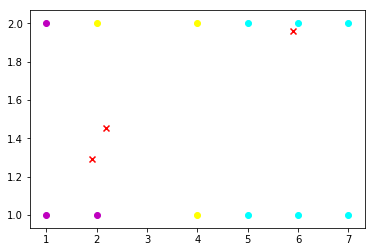

In [9]:
# print(points)
mins = np.min(points, axis=0)
maxs = np.max(points, axis=0)

init_centroids = initialize_centroids_random(points, 3, lower_bound=mins, upper_bound=maxs)
init_labels = assign_points_to_centroids(points, init_centroids)
k_labels = init_centroids.shape[0]

for k in range(k_labels):
    points_k = extract_labeled_points(points, init_labels, k)
    plt.scatter(points_k[:, 0], points_k[:, 1], c=colors[k])

plt.scatter(init_centroids[:, 0], init_centroids[:, 1], c='red', marker='x')

In [10]:
print(init_labels)

[1. 1. 0. 2. 1. 0. 0. 2. 2. 2. 2. 2.]


In [11]:
a = np.array([1, 2])
a = np.append(a, 3)
print(a)

[1 2 3]


In [12]:
mean_centroids = np.array([
    [1, 2], [3, 1], [4, 4]
])
annealed_centroids = np.array([
    [1.5, 2.5], [3, 1], [2, 2]
])

history = np.concatenate([mean_centroids, annealed_centroids], axis=1)
print(history)

indices = np.array([0, 2])
print(mean_centroids[indices])

[[1.  2.  1.5 2.5]
 [3.  1.  3.  1. ]
 [4.  4.  2.  2. ]]
[[1 2]
 [4 4]]


In [13]:
l = mean_centroids.shape[0]
n = mean_centroids.shape[1]
concat = np.zeros((l, 2, n))
concat[:, 0, :] = mean_centroids
concat[:, 1, :] = annealed_centroids

print(concat)

[[[1.  2. ]
  [1.5 2.5]]

 [[3.  1. ]
  [3.  1. ]]

 [[4.  4. ]
  [2.  2. ]]]


In [14]:
a = np.array([0, 1, 2, 3, 4, 5, 2, 2, 2])
a_new = np.delete(a, np.where(a == 2))

In [15]:
pts = np.array([[1, 2], [0, 0], [3, 3], [4, 1], [5, 6]])
pts_mean = np.mean(pts, axis=0)
print(pts_mean)

[2.6 2.4]


In [16]:
x = np.array([1, 2])
print(x.shape)
print(x.shape[0])
print(type(x) == np.ndarray)
x.ndim

(2,)
2
True


1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


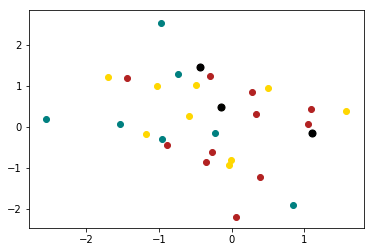

In [17]:
points = np.random.randn(30, 2)
l1 = np.zeros((12,))
l2 = np.zeros((8,)) + 1
l3 = np.zeros((10,)) + 2
labels = np.concatenate([l1, l2, l3])

print(labels)

K = np.unique(labels).shape[0]
colors = ['firebrick', 'teal', 'gold']
for k in range(K):
    subsample = points[np.where(labels == k)]
    plt.scatter(subsample[:, 0], subsample[:, 1], c=colors[k])

rand_points = get_random_points_from_clusters(points, labels)
plt.scatter(rand_points[:, 0], rand_points[:, 1], c='black', s=50)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


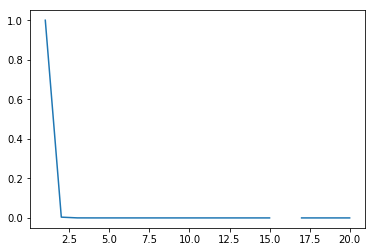

In [18]:
x = np.arange(1, 21)
y = 1 / (x ** 8)
plt.plot(x, y)

In [19]:
est = KMESAR(k_clusters=3, n_init=2, convergence_tracking=True)
print(est.algorithm_details())

--------------- Algorithm details ---------------
    * Number of clusters (k): 3
    * Centroid initialization method: random
    * Initial centroids (specified): False
    * Number of initialization repetition: 2
    * Maximum iterations: 300
    * Convergence tolerance: 0.0001
    * Simulated annealing on: True
    * Annealing method: max
    * Annealing probability function: sqrt
    * Annealing probability alpha: 1
    * Annealing weight function: log
    * Annealing weight beta: 1.1
    * Convergence tracking: True
    * Annealing tracking: False
-------------------------------------------------


In [20]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3)

n_iter=33, len(...)=35
n_iter=33, len(...)=35


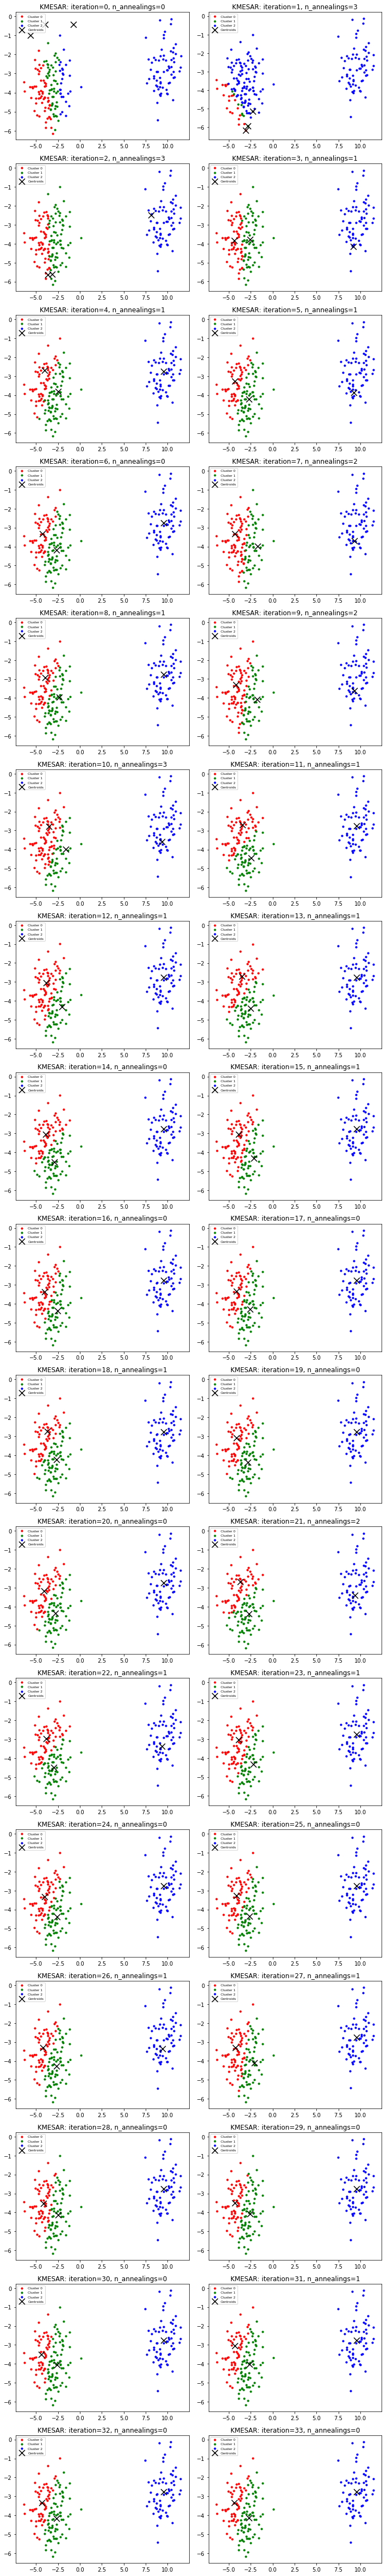

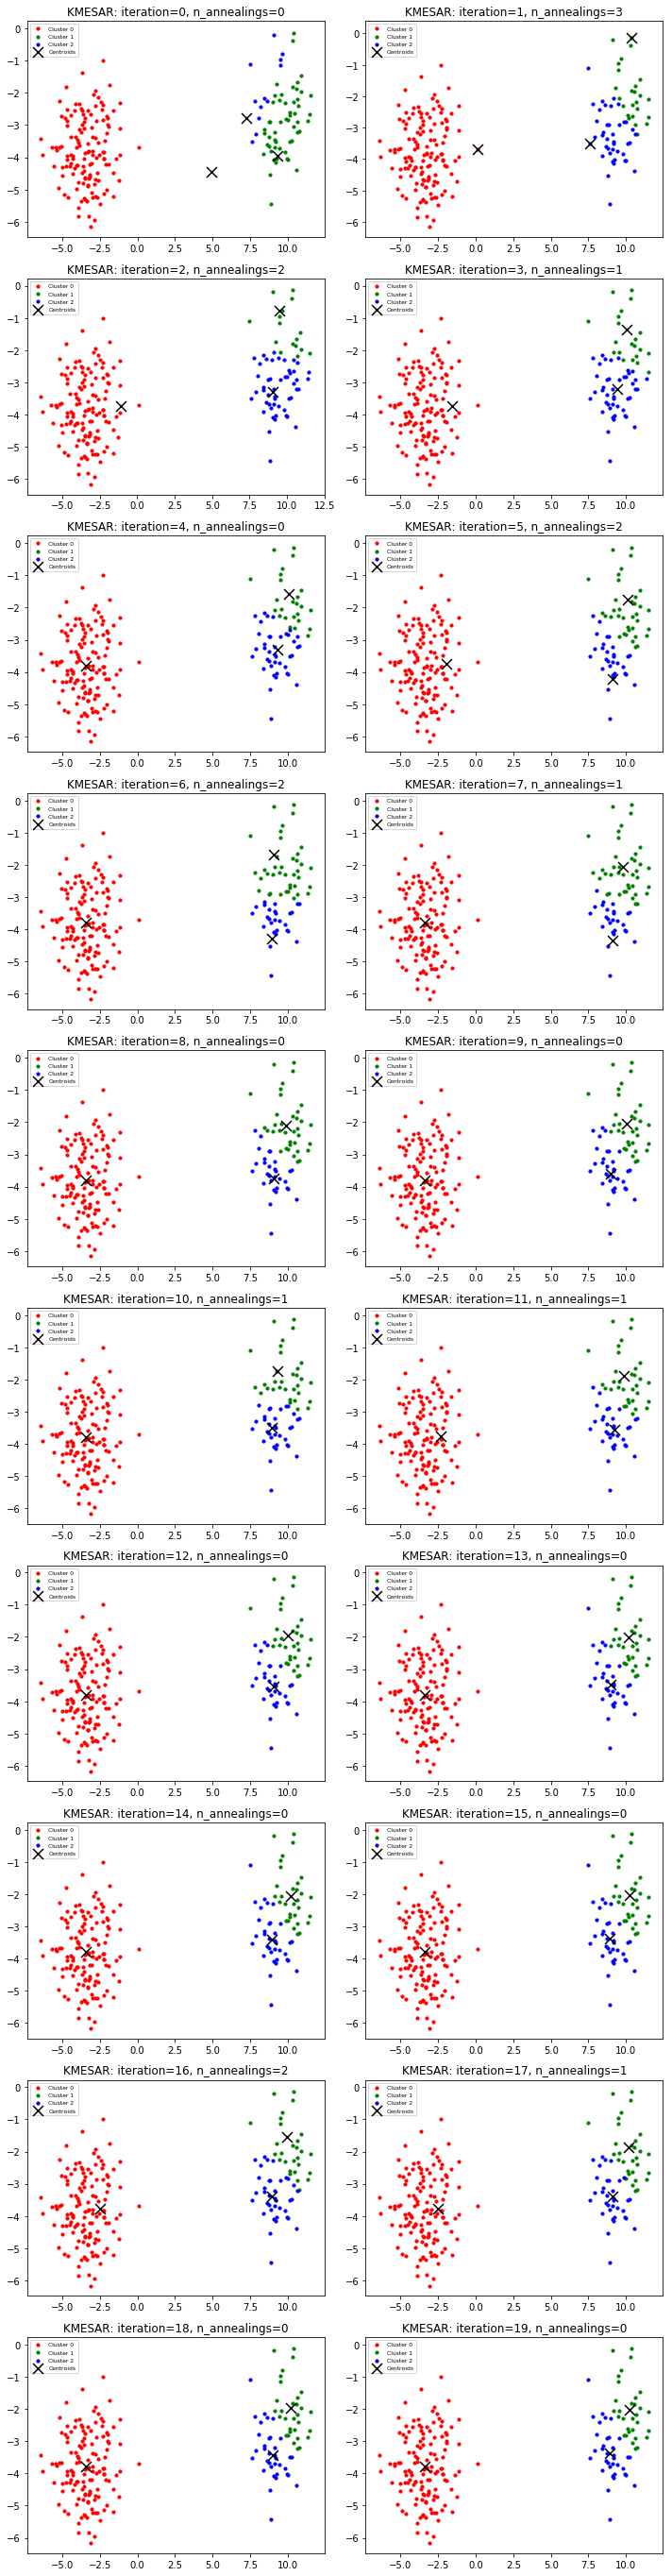

In [21]:
est.fit(X)

est.plot_tracking_history(X)

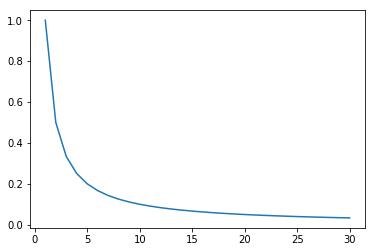